In [3]:
import pandas as pd

In [ ]:
/Users/jenny.lin/CausalImpact_Time_Series_on_Features/data/count_of_properties_with_such_features.csv

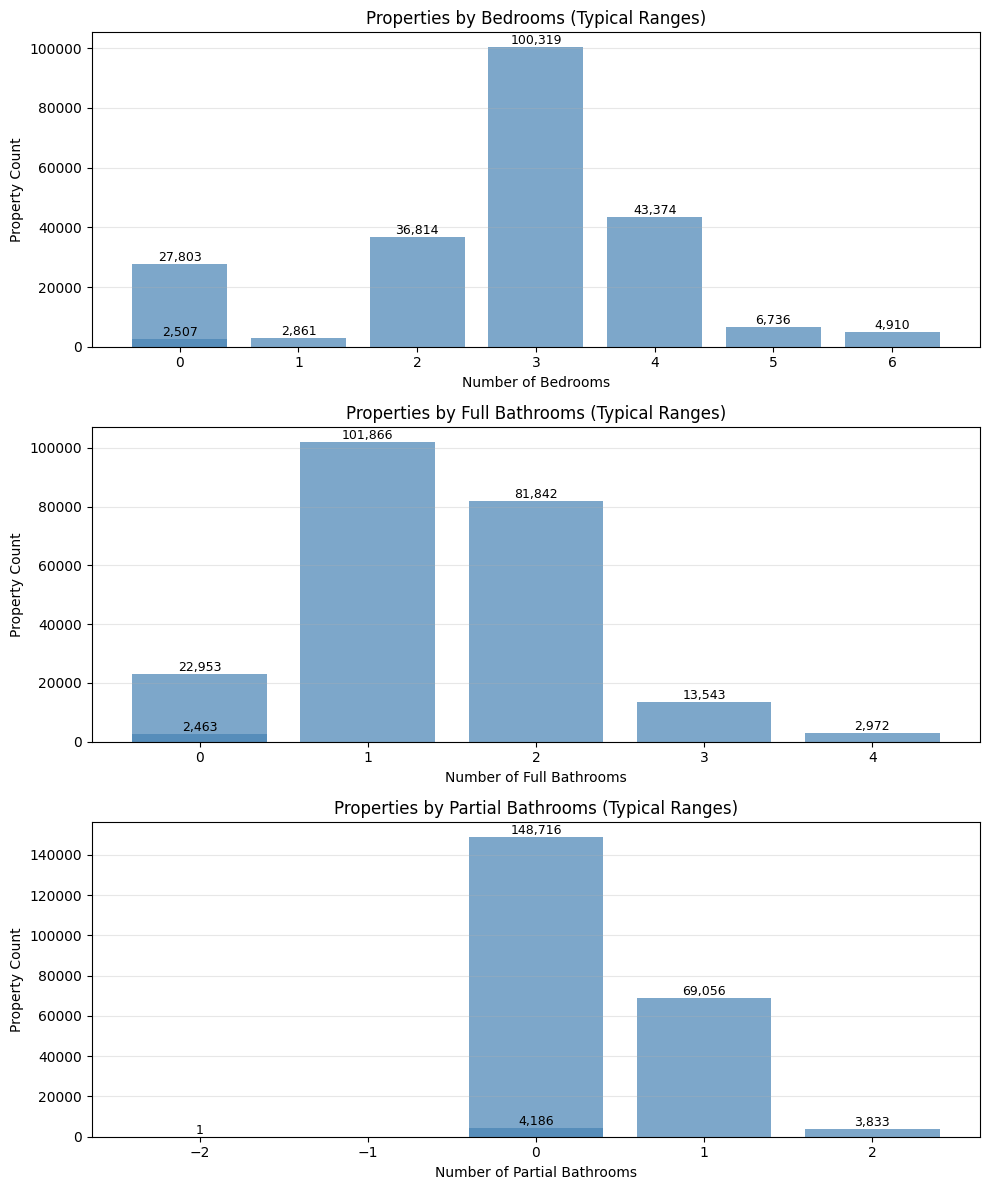

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/Users/jenny.lin/CausalImpact_Time_Series_on_Features/data/count_of_properties_with_such_features.csv')

# Filter to typical ranges only
df_filtered = df[
    ((df['CATEGORY'] == 'Bedrooms') & (df['LEVEL'] <= 6)) |
    ((df['CATEGORY'] == 'Full Bathrooms') & (df['LEVEL'] <= 4)) |
    ((df['CATEGORY'] == 'Partial Bathrooms') & (df['LEVEL'] <= 2))
]

# Create separate subplots
categories = df_filtered['CATEGORY'].unique()
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 4*len(categories)))

if len(categories) == 1:
    axes = [axes]

for idx, category in enumerate(categories):
    data = df_filtered[df_filtered['CATEGORY'] == category].sort_values('LEVEL')
    axes[idx].bar(data['LEVEL'], data['PROPERTY_COUNT'], color='steelblue', alpha=0.7)
    axes[idx].set_xlabel(f'Number of {category}')
    axes[idx].set_ylabel('Property Count')
    axes[idx].set_title(f'Properties by {category} (Typical Ranges)')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(data['PROPERTY_COUNT']):
        axes[idx].text(data['LEVEL'].iloc[i], v, f'{v:,}',
                      ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()